# FOV coordinate checks for HAP-HD

Some quick FOV coordinate checks for HAP-HD.

See https://github.com/gammasky/hess-host-analyses/issues/12

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from astropy.table import Table
table = Table.read('hess_event_list_3.fits', hdu='EVENTS')

In [3]:
table.info('stats')

<Table length=8833>
         name                mean              std              min              max      
--------------------- ------------------ ---------------- ---------------- ---------------
             EVENT_ID      1633.36363636    5121.66856254                1          345378
             BUNCH_ID      80.5562096683    45.4904843501                1             159
               OBS_ID            18406.0              0.0            18406           18406
                 TIME      96408134.3159    456.668731377    96407338.6433    96408924.392
               MULTIP      2.54602060455   0.763388934612                2               4
              TELMASK     0.636505151138   0.481005554763            False            True
                   RA             83.682          1.72309           52.989         106.497
                  DEC            24.4868          1.58699         -8.10739            41.7
              DIR_ERR                0.0              0.0             

/Users/deil/Library/Python/3.5/lib/python/site-packages/astropy-1.3.dev16367-py3.5-macosx-10.12-x86_64.egg/astropy/table/column.py:264: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


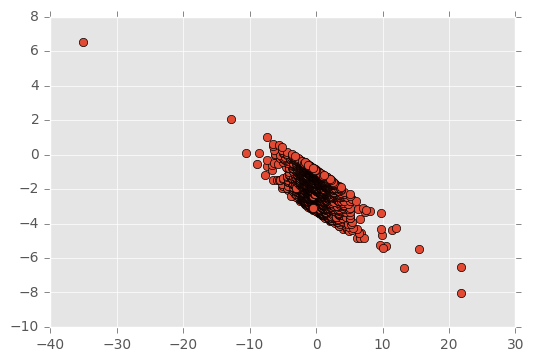

In [4]:
plt.plot(table['FOV_RADEC_LON'], table['FOV_RADEC_LON_DIFF'], 'o')
# plt.xlim(-10, 10)
# plt.ylim(-1, 1)

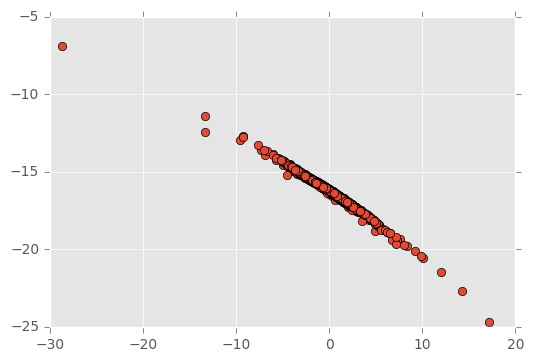

In [5]:
plt.plot(table['FOV_RADEC_LAT'], table['FOV_RADEC_LAT_DIFF'], 'o')

(-3, 3)

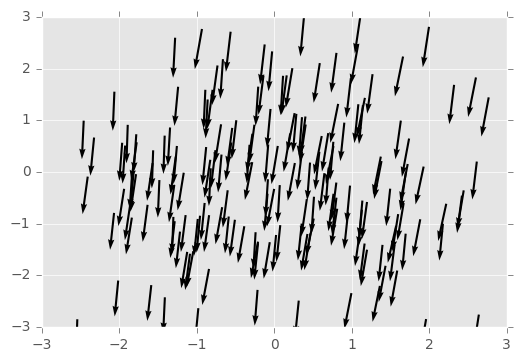

In [6]:
# mask = table['FOV_RADEC_THETA'] < 2
# t = table[mask][:10]
t = table[::50]
# t.pprint()
# print()
scale = 5e-3
plt.quiver(
    t['FOV_RADEC_LON'].data, t['FOV_RADEC_LAT'].data,
    scale * t['FOV_RADEC_LON_DIFF'].data, scale * t['FOV_RADEC_LAT_DIFF'].data,
    scale=1,
)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3, 3)

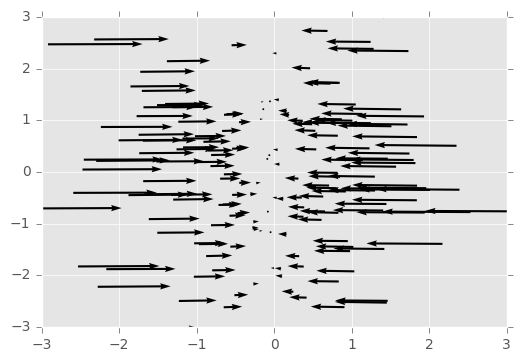

In [7]:
# mask = table['FOV_RADEC_THETA'] < 2
# t = table[mask][:10]
t = table[::50]
# t.pprint()
# print()
scale = 1e-5
plt.quiver(
    t['FOV_ALTAZ_LON'].data, t['FOV_ALTAZ_LAT'].data,
    scale * t['FOV_ALTAZ_LON_DIFF'].data, scale * t['FOV_ALTAZ_LAT_DIFF'].data,
    scale=1,
)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [8]:
mask = np.abs(table['FOV_ALTAZ_LON']) < 0.3
table[mask].info('stats')

<Table length=1464>
         name                mean              std              min              max       
--------------------- ------------------ ---------------- ---------------- ----------------
             EVENT_ID       2003.7704918    11504.9922177                2           345378
             BUNCH_ID      82.5081967213    45.4608753726                1              159
               OBS_ID            18406.0              0.0            18406            18406
                 TIME      96408154.0378    456.403422053     96407340.309    96408924.3068
               MULTIP      2.59016393443   0.792768873498                2                4
              TELMASK     0.647540983607   0.477735971177            False             True
                   RA            83.6222          0.27005          82.7832           84.679
                  DEC            24.5434          1.40355          17.5322          29.0981
              DIR_ERR                0.0              0.0   

/Users/deil/Library/Python/3.5/lib/python/site-packages/astropy-1.3.dev16367-py3.5-macosx-10.12-x86_64.egg/astropy/table/column.py:264: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)
